# Model Testing

In [1723]:
import pandas as pd
import numpy as np

In [1753]:

df = pd. read_csv('featuredtrain.csv')

test = pd.read_csv("featuredtest.csv")


print(len(df))
df.head(3)


30990


,departure_iataCode,departure_scheduledTime,departure_estimatedTime,departure_actualTime,arrival_iataCode,arrival_terminal,arrival_scheduledTime,arrival_estimatedTime,airline_name,airline_icaoCode,flight_number,flight_icaoNumber,codeshared_airline_name,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_icaoNumber,arrival_actualTime,departure_scheduledDate,departure_actualDate,departure_estimatedRunwayDate,departure_estimatedRunwayTime,departure_actualRunwayDate,departure_actualRunwayTime,arrival_scheduledDate,arrival_estimatedDate,arrival_estimatedRunwayDate,arrival_estimatedRunwayTime,arrival_actualRunwayDate,arrival_actualRunwayTime,Temperature (°F)_Avg,Dew Point (°F)_Avg,Dew Point (°F)_Min,Humidity (%)_Avg,Humidity (%)_Min,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Min,Pressure (in)_Max,is_delay,delay_minutes,delay_category,hours_category,hours_cate,departure_arrival,country,scheduled_duration,Temperature_cate,Humidity_cate,Humid_Temp,shared
0,lhe,1900-01-01 20:50:00,2023-07-20t20:00:00.000,20:15:00,ruh,4,1900-01-01 23:20:00,21:54:00,saudia,sva,737,sva737,NaN,NaN,NaN,NaN,NaN,2023-07-20,2023-07-20,2023-07-20,20:15:00,2023-07-20,20:15:00,2023-07-20,2023-07-20,NaN,NaN,NaN,NaN,88.2,79.8,77,76.0,63,5.3,28.8,28.7,28.9,0.0,0.0,No Delay,0,low,lhe -> ruh,Saudi Arabia,150.0,High,High,High,0
1,lhe,1900-01-01 23:30:00,2023-07-26t23:30:00.000,23:51:00,kwi,NaN,1900-01-01 01:30:00,01:24:00,pakistan international airlines,pia,205,pia205,NaN,NaN,NaN,NaN,NaN,2023-07-26,2023-07-26,2023-07-26,23:51:00,2023-07-26,23:51:00,2023-07-27,2023-07-27,NaN,NaN,NaN,NaN,86.9,78.9,75,77.4,59,8.1,28.9,28.8,28.9,1.0,21.0,Short Delay,0,low,lhe -> kwi,Pakistan,120.0,High,High,High,0
2,lhe,1900-01-01 10:45:00,2023-07-24t10:45:00.000,10:54:00,bgw,NaN,1900-01-01 13:10:00,12:44:00,fly baghdad,fba,344,fba344,NaN,NaN,NaN,NaN,NaN,2023-07-24,2023-07-24,2023-07-24,10:54:00,2023-07-24,10:54:00,2023-07-24,2023-07-24,NaN,NaN,NaN,NaN,87.3,78.2,75,74.3,60,7.5,28.9,28.8,28.9,1.0,9.0,Short Delay,1,low,lhe -> bgw,Iraq,145.0,High,High,High,0


In [1754]:

print( len(df) )

nulls = df.isnull().sum()
nulls_percentage = (df.isnull().mean()) * 100

missing_summary = pd.DataFrame({'Missing Values': nulls, 'Percentage Missing': nulls_percentage})

missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage Missing', ascending=False)



30990


,Missing Values,Percentage Missing
arrival_actualRunwayTime,30738,99.186834
arrival_estimatedRunwayDate,30738,99.186834
arrival_estimatedRunwayTime,30738,99.186834
arrival_actualRunwayDate,30738,99.186834
arrival_actualTime,30738,99.186834
codeshared_airline_icaoCode,19521,62.991288
codeshared_flight_number,19521,62.991288
codeshared_flight_icaoNumber,19521,62.991288
codeshared_airline_name,19521,62.991288
arrival_terminal,19181,61.894159


In [1755]:
df.columns

Index(['departure_iataCode', 'departure_scheduledTime',
       'departure_estimatedTime', 'departure_actualTime', 'arrival_iataCode',
       'arrival_terminal', 'arrival_scheduledTime', 'arrival_estimatedTime',
       'airline_name', 'airline_icaoCode', 'flight_number',
       'flight_icaoNumber', 'codeshared_airline_name',
       'codeshared_airline_icaoCode', 'codeshared_flight_number',
       'codeshared_flight_icaoNumber', 'arrival_actualTime',
       'departure_scheduledDate', 'departure_actualDate',
       'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
       'departure_actualRunwayDate', 'departure_actualRunwayTime',
       'arrival_scheduledDate', 'arrival_estimatedDate',
       'arrival_estimatedRunwayDate', 'arrival_estimatedRunwayTime',
       'arrival_actualRunwayDate', 'arrival_actualRunwayTime',
       'Temperature (°F)_Avg', 'Dew Point (°F)_Avg', 'Dew Point (°F)_Min',
       'Humidity (%)_Avg', 'Humidity (%)_Min', 'Wind Speed (mph)_Avg',
       'Pressu

In [1756]:
df = df.drop( columns = ['arrival_terminal', 'codeshared_airline_icaoCode', 
                        'departure_actualDate', 'departure_actualTime',
                        'arrival_estimatedTime', 'arrival_estimatedDate',
                        'arrival_estimatedRunwayTime', 'arrival_estimatedRunwayDate',
                        'arrival_actualRunwayTime', 'arrival_actualRunwayDate',
                        'departure_estimatedTime',
                        'arrival_actualTime', 
                        ] )

test = test.drop( columns = [ 'airline_iataCode',
    'arrival_actualRunwayDate',
    'arrival_actualRunwayTime',
    'arrival_actualTime',
    'arrival_baggage',
    'arrival_estimatedDate',
    'arrival_estimatedRunwayDate',
    'arrival_estimatedRunwayTime',
    'arrival_estimatedTime',
    'arrival_gate',
    'arrival_icaoCode',
    'arrival_terminal',
    'codeshared_airline_iataCode',
    'codeshared_airline_icaoCode',
    'codeshared_flight_iataNumber',
    'departure_gate',
    'departure_hour',
    'departure_icaoCode',
    'departure_terminal',
    'flight_iataNumber'
    ] )

In [1757]:

test.rename(columns={
    'Flight Number': 'flight_number', 
    'Departure IATA Code': 'departure_iataCode',
    'Arrival IATA Code': 'arrival_iataCode',
    'Scheduled Date': 'departure_scheduledDate',
    'Temperature_Condition' : "Temperature_cate",
}, inplace=True)


In [1758]:

missing_columns = set(df.columns) - set(test.columns)

print("Columns in training but not in test:", missing_columns)


Columns in training but not in test: {'delay_minutes', 'delay_category', 'is_delay'}


In [1759]:
df = df.drop( columns = ['Temperature_cate', 'Humidity_cate', 'hours_category', 'departure_iataCode',   
                        'Dew Point (°F)_Min', 'Humidity (%)_Min', 'Pressure (in)_Min',
                        
                        'codeshared_airline_name',  'codeshared_flight_number',	'codeshared_flight_icaoNumber',
                                        
                        'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
                        'departure_actualRunwayDate', 'departure_actualRunwayTime',
                        'airline_name', 'flight_number', 'Humid_Temp', 
                        ] )

test = test.drop( columns = [ 'Temperature_cate', 'hours_category', 'Humidity_cate', 'departure_iataCode',
                        
                        'Dew Point (°F)_Min', 'Humidity (%)_Min', 'Pressure (in)_Min', 
                        'Arrival Estimated Time', 'Arrival Estimated Date', 'Scheduled Time',
                        
                        'codeshared_airline_name', 'codeshared_flight_number',	'codeshared_flight_icaoNumber',
                                        
                        'departure_estimatedRunwayDate', 'departure_estimatedRunwayTime',
                        'departure_actualRunwayDate', 'departure_actualRunwayTime',
                        'airline_name', 'flight_number', 'Humid_Temp',
                        ] )


In [1760]:

pd.set_option('display.max_columns', None)
df.head()


,departure_scheduledTime,arrival_iataCode,arrival_scheduledTime,airline_icaoCode,flight_icaoNumber,departure_scheduledDate,arrival_scheduledDate,Temperature (°F)_Avg,Dew Point (°F)_Avg,Humidity (%)_Avg,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Max,is_delay,delay_minutes,delay_category,hours_cate,departure_arrival,country,scheduled_duration,shared
0,1900-01-01 20:50:00,ruh,1900-01-01 23:20:00,sva,sva737,2023-07-20,2023-07-20,88.2,79.8,76.0,5.3,28.8,28.9,0.0,0.0,No Delay,low,lhe -> ruh,Saudi Arabia,150.0,0
1,1900-01-01 23:30:00,kwi,1900-01-01 01:30:00,pia,pia205,2023-07-26,2023-07-27,86.9,78.9,77.4,8.1,28.9,28.9,1.0,21.0,Short Delay,low,lhe -> kwi,Pakistan,120.0,0
2,1900-01-01 10:45:00,bgw,1900-01-01 13:10:00,fba,fba344,2023-07-24,2023-07-24,87.3,78.2,74.3,7.5,28.9,28.9,1.0,9.0,Short Delay,low,lhe -> bgw,Iraq,145.0,0
3,1900-01-01 03:30:00,doh,1900-01-01 05:30:00,aal,aal8284,2023-07-27,2023-07-27,82.9,77.1,83.7,7.5,28.9,28.9,1.0,6.0,Short Delay,high,lhe -> doh,USA,120.0,1
4,1900-01-01 09:55:00,doh,1900-01-01 11:55:00,voz,voz6173,2023-07-23,2023-07-23,86.6,75.8,71.2,8.1,28.9,29.0,1.0,5.0,Short Delay,low,lhe -> doh,Australia,120.0,1


In [1761]:
for col in df.columns:
    print(col, df[col].unique())

departure_scheduledTime ['1900-01-01 20:50:00' '1900-01-01 23:30:00' '1900-01-01 10:45:00'
 '1900-01-01 03:30:00' '1900-01-01 09:55:00' '1900-01-01 21:10:00'
 '1900-01-01 04:00:00' '1900-01-01 04:50:00' '1900-01-01 16:15:00'
 '1900-01-01 19:25:00' '1900-01-01 01:00:00' '1900-01-01 02:35:00'
 '1900-01-01 17:00:00' '1900-01-01 13:00:00' '1900-01-01 02:25:00'
 '1900-01-01 03:50:00' '1900-01-01 15:05:00' '1900-01-01 04:25:00'
 '1900-01-01 01:50:00' '1900-01-01 19:45:00' '1900-01-01 04:15:00'
 '1900-01-01 22:00:00' '1900-01-01 09:00:00' '1900-01-01 00:20:00'
 '1900-01-01 09:25:00' '1900-01-01 07:40:00' '1900-01-01 11:00:00'
 '1900-01-01 09:30:00' '1900-01-01 20:30:00' '1900-01-01 07:00:00'
 '1900-01-01 04:40:00' '1900-01-01 20:35:00' '1900-01-01 03:15:00'
 '1900-01-01 10:30:00' '1900-01-01 23:59:00' '1900-01-01 15:35:00'
 '1900-01-01 09:50:00' '1900-01-01 10:10:00' '1900-01-01 11:05:00'
 '1900-01-01 21:25:00' '1900-01-01 23:40:00' '1900-01-01 15:40:00'
 '1900-01-01 21:45:00' '1900-01-01 00:

In [1762]:

df_encoded = df.copy()
test_encoded = test.copy()


df_encoded = pd.get_dummies(df, columns=[ 'hours_cate',  ])

test_encoded = pd.get_dummies(test, columns=[ 'hours_cate', ])

test_encoded.head()


,arrival_iataCode,departure_scheduledDate,airline_icaoCode,arrival_scheduledDate,arrival_scheduledTime,flight_icaoNumber,Temperature (°F)_Avg,Dew Point (°F)_Avg,Humidity (%)_Avg,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Max,departure_arrival,country,departure_scheduledTime,scheduled_duration,shared,hours_cate_high,hours_cate_low
0,dxb,2024-05-14,eth,2024-05-14,1900-01-01 02:55:00,eth4361,90.4,55.7,33.2,8.0,29.0,29.1,lhe -> dxb,Ethiopia,1900-01-01 00:20:00,155.0,1,True,False
1,ruh,2024-05-07,eth,2024-05-07,1900-01-01 06:30:00,eth1876,93.0,55.1,31.1,4.5,28.9,29.0,lhe -> ruh,Ethiopia,1900-01-01 04:15:00,135.0,1,True,False
2,doh,2024-05-09,oma,2024-05-09,1900-01-01 04:55:00,oma6030,91.6,64.8,42.5,8.2,28.9,28.9,lhe -> doh,Oman,1900-01-01 03:10:00,105.0,1,True,False
3,jed,2024-05-12,sva,2024-05-12,1900-01-01 06:15:00,sva739,84.7,65.8,54.2,10.5,29.1,29.1,lhe -> jed,Saudi Arabia,1900-01-01 02:50:00,205.0,0,True,False
4,auh,2024-05-16,klm,2024-05-16,1900-01-01 07:00:00,klm3932,96.6,61.8,33.3,3.9,29.0,29.1,lhe -> auh,Netherlands,1900-01-01 04:35:00,145.0,1,True,False


In [1763]:

missing_columns = set(test_encoded.columns) - set(df_encoded.columns)
missing_columns


set()

In [1764]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# df_encoded['departure_iataCode'] = encoder.fit_transform(df['departure_iataCode'].fillna('Unknown'))
df_encoded['arrival_iataCode'] = encoder.fit_transform(df['arrival_iataCode'].fillna('Unknown'))
df_encoded['departure_arrival'] = encoder.fit_transform(df['departure_arrival'].fillna('Unknown'))

df_encoded['airline_icaoCode'] = encoder.fit_transform(df['airline_icaoCode'].fillna('Unknown'))
df_encoded['flight_icaoNumber'] = encoder.fit_transform(df['flight_icaoNumber'].fillna('Unknown'))
df_encoded['country'] = encoder.fit_transform(df['country'].fillna('Unknown'))

df_encoded['delay_category'] = encoder.fit_transform(df['delay_category'].fillna('Unknown'))
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)


# test_encoded['departure_iataCode'] = encoder.fit_transform(test['departure_iataCode'].fillna('Unknown'))
test_encoded['arrival_iataCode'] = encoder.fit_transform(test['arrival_iataCode'].fillna('Unknown'))
test_encoded['departure_arrival'] = encoder.fit_transform(test['departure_arrival'].fillna('Unknown'))

test_encoded['airline_icaoCode'] = encoder.fit_transform(test['airline_icaoCode'].fillna('Unknown'))
test_encoded['flight_icaoNumber'] = encoder.fit_transform(test['flight_icaoNumber'].fillna('Unknown'))
test_encoded['country'] = encoder.fit_transform(test['country'].fillna('Unknown'))



{'Moderate Delay': 0, 'No Delay': 1, 'Short Delay': 2}


In [1765]:

test = test.loc[:, ~test.columns.duplicated()]


In [1766]:
# Convert the datetime columns to time only
df_encoded['departure_scheduledTime'] = pd.to_datetime(df_encoded['departure_scheduledTime']).dt.time
df_encoded['arrival_scheduledTime'] = pd.to_datetime(df_encoded['arrival_scheduledTime']).dt.time


test_encoded['departure_scheduledTime'] = pd.to_datetime(test_encoded['departure_scheduledTime']).dt.time
test_encoded['arrival_scheduledTime'] = pd.to_datetime(test_encoded['arrival_scheduledTime']).dt.time


In [1767]:
df.columns

Index(['departure_scheduledTime', 'arrival_iataCode', 'arrival_scheduledTime',
       'airline_icaoCode', 'flight_icaoNumber', 'departure_scheduledDate',
       'arrival_scheduledDate', 'Temperature (°F)_Avg', 'Dew Point (°F)_Avg',
       'Humidity (%)_Avg', 'Wind Speed (mph)_Avg', 'Pressure (in)_Avg',
       'Pressure (in)_Max', 'is_delay', 'delay_minutes', 'delay_category',
       'hours_cate', 'departure_arrival', 'country', 'scheduled_duration',
       'shared'],
      dtype='object')

In [1768]:
# Convert date columns to datetime (handle day-first format explicitly)
date_columns = ['departure_scheduledDate', 'arrival_scheduledDate',]
for col in date_columns:
    df_encoded[col] = pd.to_datetime(df_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')

# Convert time columns to total seconds
time_columns = ['departure_scheduledTime', 'arrival_scheduledTime', ]
for col in time_columns:
    # Ensure the time column is in string format before converting to timedelta
    df_encoded[col] = pd.to_timedelta(df_encoded[col].astype(str), errors='coerce').dt.total_seconds()

# Apply the same transformations to the test set
for col in date_columns:
    test_encoded[col] = pd.to_datetime(test_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')

for col in time_columns:
    test_encoded[col] = pd.to_timedelta(test_encoded[col].astype(str), errors='coerce').dt.total_seconds()

print(test_encoded.head(3))

df_encoded.head(3)


C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_4132\765563122.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_encoded[col] = pd.to_datetime(df_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_4132\765563122.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_encoded[col] = pd.to_datetime(df_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignore')
C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_4132\765563122.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  test_encoded[col] = pd.to_datetime(test_encoded[col], dayfirst=True, errors='coerce').astype(int, errors='ignor

   arrival_iataCode  departure_scheduledDate  airline_icaoCode  \
0                18      1715644800000000000                17   
1                53      1715040000000000000                17   
2                17      1715212800000000000                47   

   arrival_scheduledDate  arrival_scheduledTime  flight_icaoNumber  \
0    1715644800000000000                10500.0                107   
1    1715040000000000000                23400.0                104   
2    1715212800000000000                17700.0                241   

   Temperature (°F)_Avg  Dew Point (°F)_Avg  Humidity (%)_Avg  \
0                  90.4                55.7              33.2   
1                  93.0                55.1              31.1   
2                  91.6                64.8              42.5   

   Wind Speed (mph)_Avg  Pressure (in)_Avg  Pressure (in)_Max  \
0                   8.0               29.0               29.1   
1                   4.5               28.9               29.0  

,departure_scheduledTime,arrival_iataCode,arrival_scheduledTime,airline_icaoCode,flight_icaoNumber,departure_scheduledDate,arrival_scheduledDate,Temperature (°F)_Avg,Dew Point (°F)_Avg,Humidity (%)_Avg,Wind Speed (mph)_Avg,Pressure (in)_Avg,Pressure (in)_Max,is_delay,delay_minutes,delay_category,departure_arrival,country,scheduled_duration,shared,hours_cate_high,hours_cate_low
0,75000.0,52,84000.0,68,579,1689811200000000000,1689811200000000000,88.2,79.8,76.0,5.3,28.8,28.9,0.0,0.0,1,126,35,150.0,0,False,True
1,84600.0,38,5400.0,53,309,1690329600000000000,1690416000000000000,86.9,78.9,77.4,8.1,28.9,28.9,1.0,21.0,2,118,30,120.0,0,False,True
2,38700.0,7,47400.0,20,131,1690156800000000000,1690156800000000000,87.3,78.2,74.3,7.5,28.9,28.9,1.0,9.0,2,100,17,145.0,0,False,True


In [1769]:
# Create new features based on weather columns
df_encoded['Temp_Humidity_Interaction'] = df_encoded['Temperature (°F)_Avg'] * df_encoded['Humidity (%)_Avg']
df_encoded['Temp_to_DewPoint_Ratio'] = df_encoded['Temperature (°F)_Avg'] / df_encoded['Dew Point (°F)_Avg']


# Create new features based on weather columns
test_encoded['Temp_Humidity_Interaction'] = test_encoded['Temperature (°F)_Avg'] * test_encoded['Humidity (%)_Avg']
test_encoded['Temp_to_DewPoint_Ratio'] = test_encoded['Temperature (°F)_Avg'] / test_encoded['Dew Point (°F)_Avg']



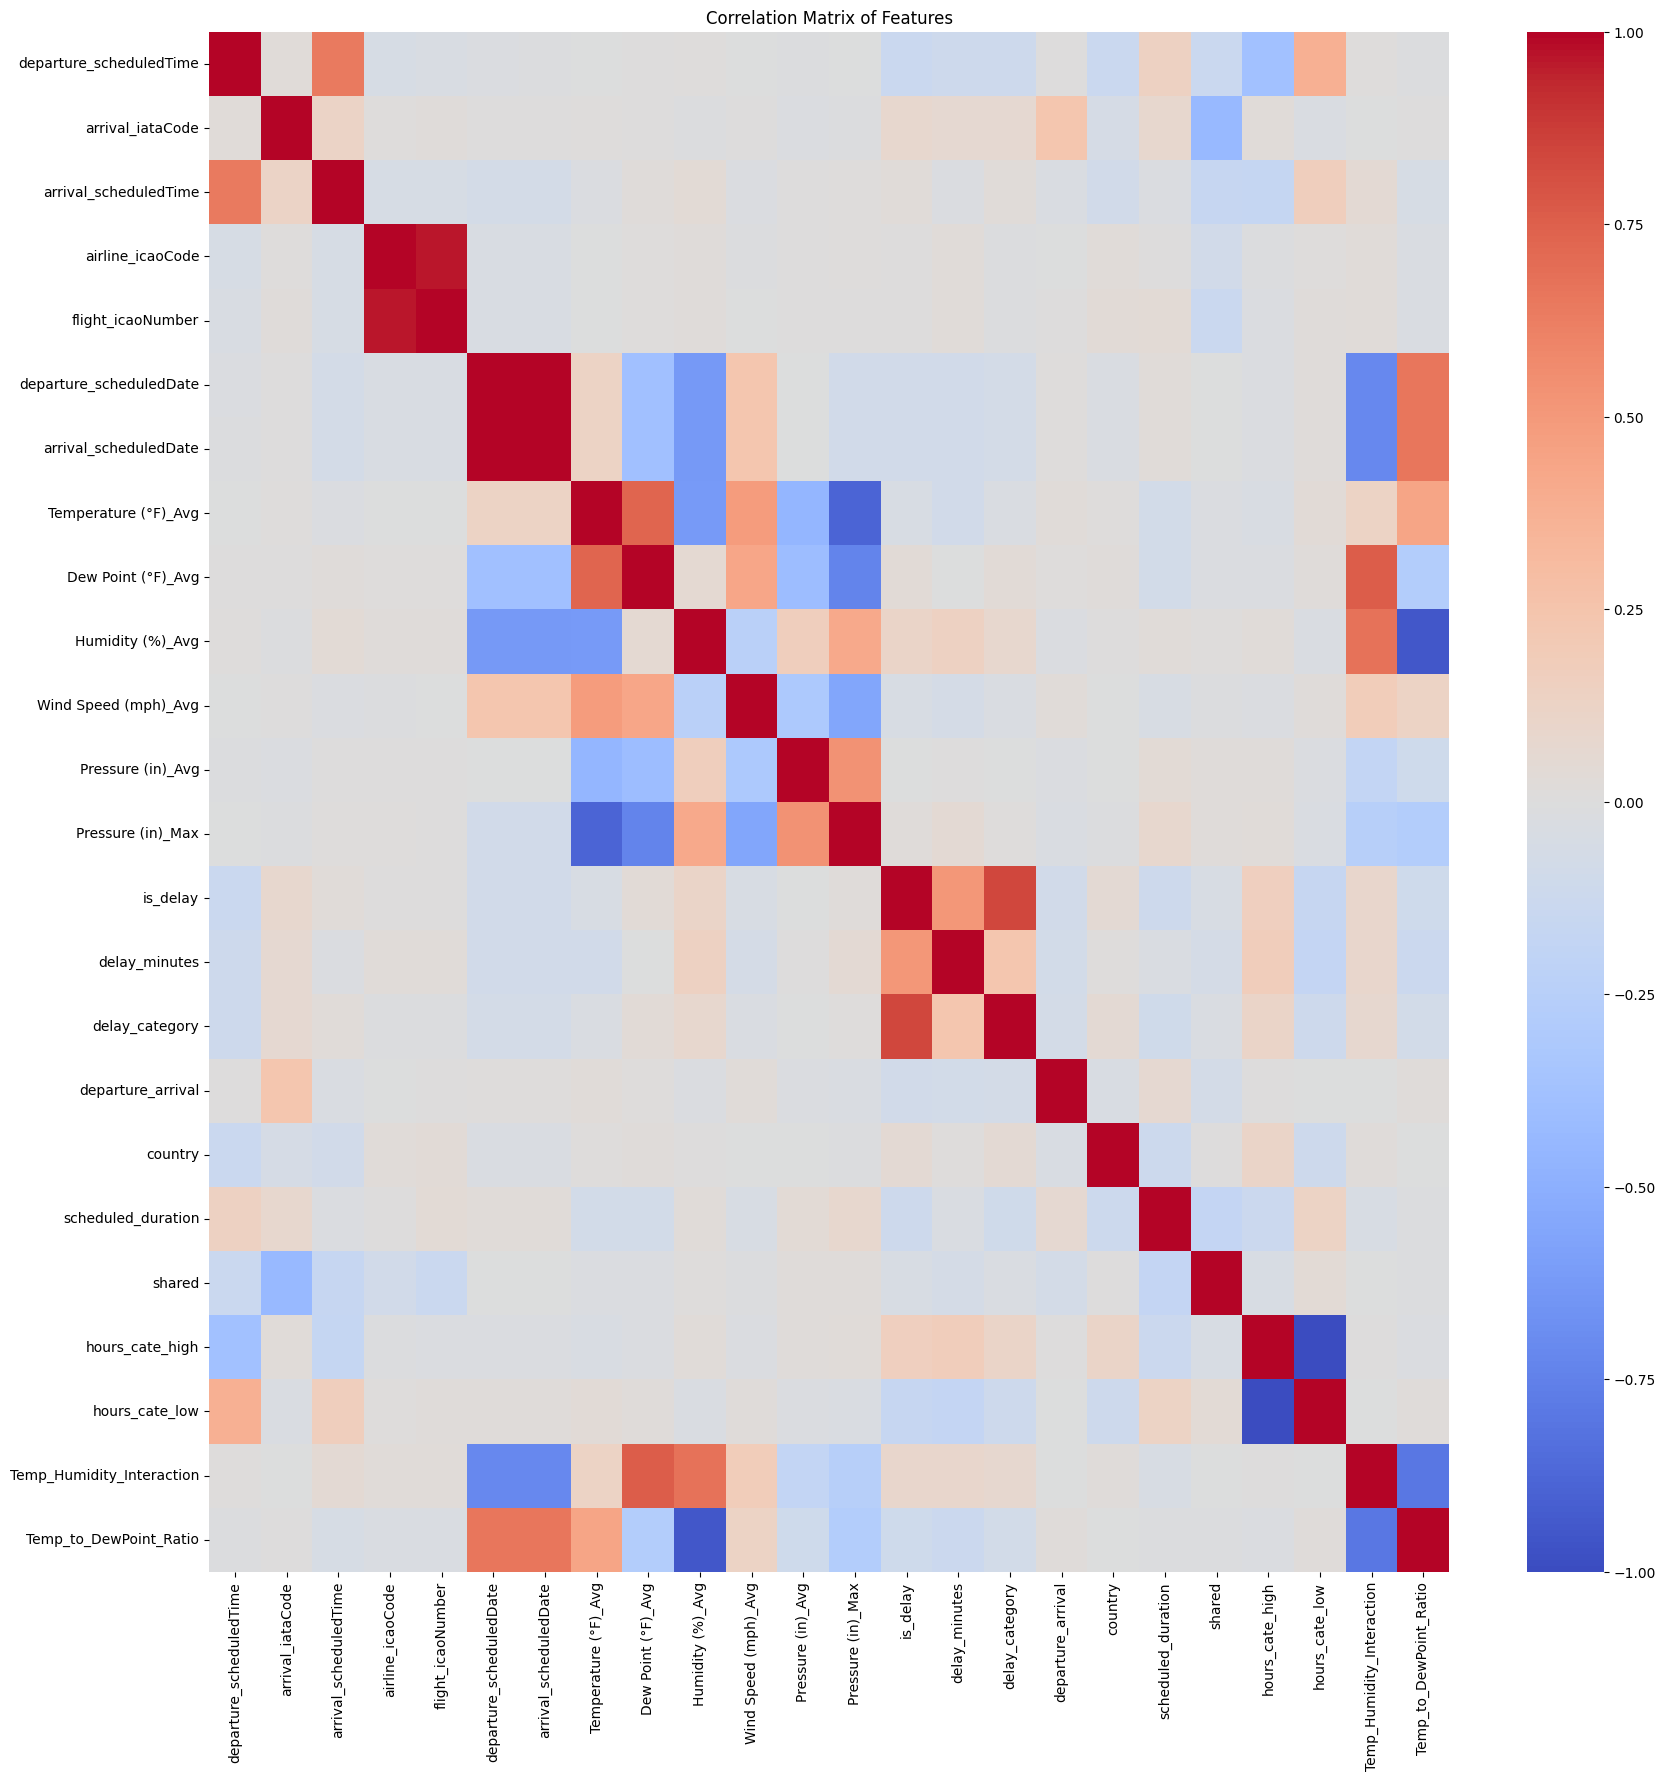

In [1770]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()



In [1771]:
df_encoded.columns

Index(['departure_scheduledTime', 'arrival_iataCode', 'arrival_scheduledTime',
       'airline_icaoCode', 'flight_icaoNumber', 'departure_scheduledDate',
       'arrival_scheduledDate', 'Temperature (°F)_Avg', 'Dew Point (°F)_Avg',
       'Humidity (%)_Avg', 'Wind Speed (mph)_Avg', 'Pressure (in)_Avg',
       'Pressure (in)_Max', 'is_delay', 'delay_minutes', 'delay_category',
       'departure_arrival', 'country', 'scheduled_duration', 'shared',
       'hours_cate_high', 'hours_cate_low', 'Temp_Humidity_Interaction',
       'Temp_to_DewPoint_Ratio'],
      dtype='object')

In [1797]:
print(len(df_encoded))


delays = df_encoded[df_encoded['is_delay'] == 1]
on_time = df_encoded[df_encoded['is_delay'] == 0]

print(len(delays))
print(len(on_time))


30990
25795
5195


In [1798]:
# df_encoded.to_csv("TrainEncoded.csv", index=False,)

In [1799]:
df_encoded = df_encoded.astype(np.float32)  # Convert all data to float32 if necessary

# Under Sampling

In [1815]:
# import pandas as pd
# from sklearn.utils import resample

# delays = df_encoded[df_encoded['is_delay'] == 1]
# on_time = df_encoded[df_encoded['is_delay'] == 0]

# # Find the smallest group size (based on on-time or delay categories)
# min_size = len(on_time)
# target_sample_size = min_size // len(delays['delay_category'].unique())

# # Perform undersampling for delays by categories
# undersampled_delays = pd.DataFrame()
# for category in delays['delay_category'].unique():
#     category_data = delays[delays['delay_category'] == category]
#     undersampled_category = resample(category_data, 
#                                       replace=False,  # no replacement
#                                       n_samples=min(len(category_data), target_sample_size),  # handle small categories
#                                       random_state=42)
#     undersampled_delays = pd.concat([undersampled_delays, undersampled_category])

# # Combine undersampled delays with on-time data
# balanced_data = pd.concat([undersampled_delays, on_time])

# # Shuffle the final balanced dataset
# balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# print(balanced_data['is_delay'].value_counts())

# X = balanced_data.drop(['is_delay', 'delay_minutes', 'delay_category'], axis=1) 
# y = balanced_data['is_delay']


In [1816]:
from sklearn.utils import resample

# Perform undersampling on delays
delays_undersampled = resample(
    delays,
    replace=False,           # Sample without replacement
    n_samples=len(on_time),  # Match the size of the 'on_time' class
    random_state=42          # Set a seed for reproducibility
)

# Combine the undersampled 'delays' with 'on_time'
balanced_data = pd.concat([delays_undersampled, on_time])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the sizes
print("Size of balanced dataset:", len(balanced_data))
print("Delays in balanced dataset:", len(balanced_data[balanced_data['is_delay'] == 1]))
print("On-time in balanced dataset:", len(balanced_data[balanced_data['is_delay'] == 0]))

print(balanced_data['is_delay'].value_counts())

X = balanced_data.drop(['is_delay', 'delay_minutes', 'delay_category'], axis=1) 
y = balanced_data['is_delay']


Size of balanced dataset: 10390
Delays in balanced dataset: 5195
On-time in balanced dataset: 5195
is_delay
1.0    5195
0.0    5195
Name: count, dtype: int64


In [1802]:
# balanced_df.to_csv('Finaltrain.csv', index=False)

Training Accuracy: 0.99
Test Accuracy: 0.80

Confusion Matrix:
[[821 207]
 [209 841]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      1028
         1.0       0.80      0.80      0.80      1050

    accuracy                           0.80      2078
   macro avg       0.80      0.80      0.80      2078
weighted avg       0.80      0.80      0.80      2078



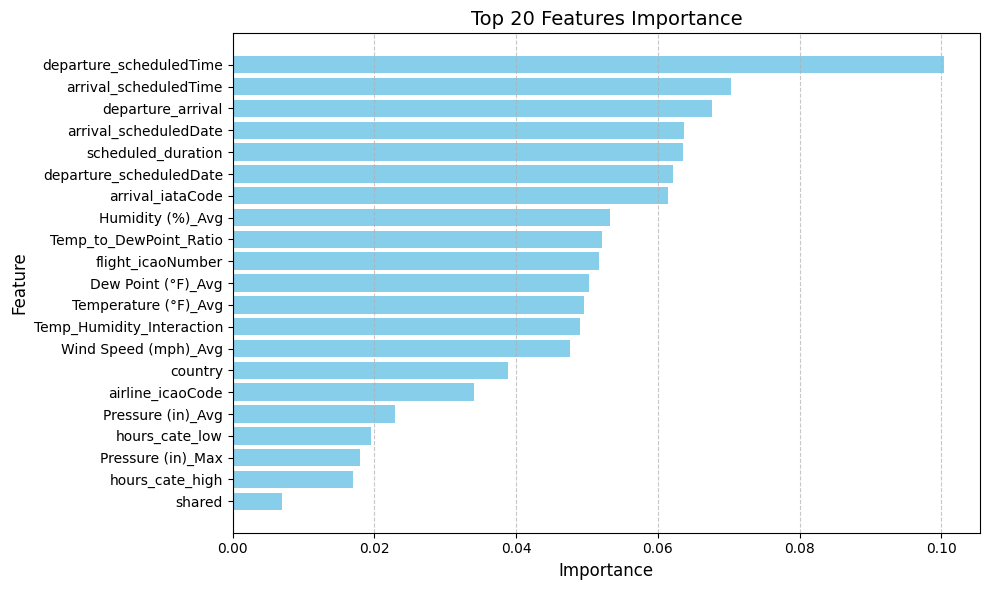

In [1806]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=5, 
    random_state=42,
    class_weight = 'balanced',
    max_features = 'sqrt'
)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


y_pred = rf_classifier.predict(X_test)

y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)  
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Features Importance', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1779]:

extra_columns_in_test = set(test_encoded.columns) - set(X.columns)
print(extra_columns_in_test)


set()


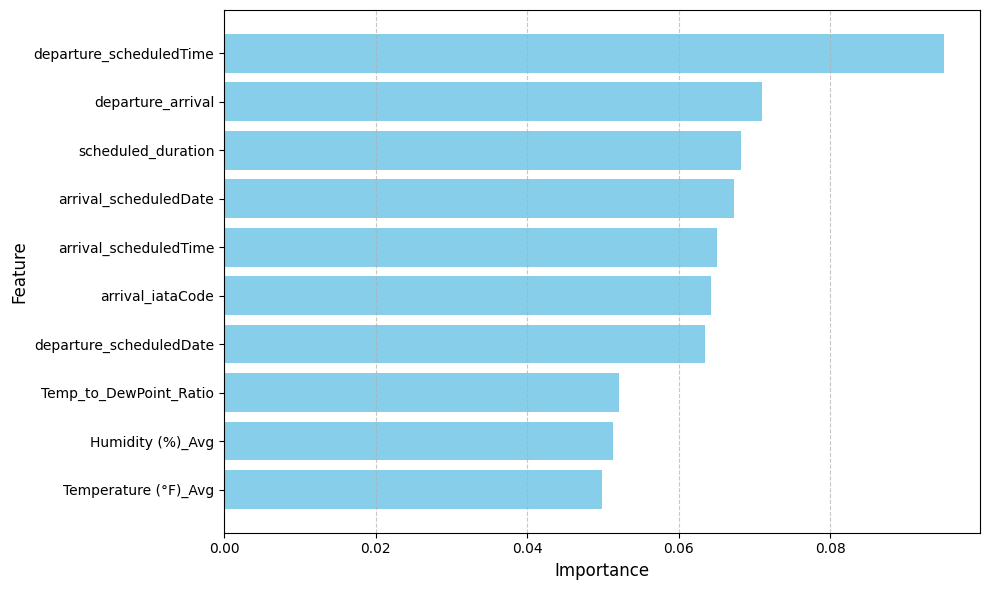

In [1810]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=5, 
    random_state=42, 
    bootstrap=False,
    class_weight = 'balanced'
)

# Fit the model on the training data
rf_classifier.fit(X, y)


test_encoded = test_encoded[X.columns]
y_pred = rf_classifier.predict(test_encoded)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1811]:

unique_values, freq = np.unique(y_pred, return_counts=True)
print(unique_values)
freq


[0. 1.]


array([5110, 7806])

In [1812]:
# Map 1 to 'Delayed' and 0 to 'On-time'
label_mapping = {1: 'delayed', 0: 'on-time'}
y_encoded = pd.Series(y_pred).map(label_mapping)

# Display encoded values
print(y_encoded.head())


0    on-time
1    on-time
2    on-time
3    on-time
4    on-time
dtype: object


In [1813]:
print(len(y_encoded))
ID = [ i + 1 for i in range( 12914 )]


12916


In [1814]:

submission = pd.DataFrame({
    'ID': ID,       # Replace 'test' with your DataFrame that contains the ID
    'Delay': y_encoded[:12914]         # Ensure y_pred is the same length as test['ID']
})

# Save to CSV
submission.to_csv('binary.csv', index=False)

submission.head()


,ID,Delay
0,1,on-time
1,2,on-time
2,3,on-time
3,4,on-time
4,5,on-time


# MulitClassifier

In [1785]:
print(df_encoded['delay_category'].value_counts())

delay_category
2.0    25360
1.0     5195
0.0      435
Name: count, dtype: int64


In [1818]:
from sklearn.utils import resample

# Separate each category
short_delay = df_encoded[df_encoded['delay_category'] == 2]
no_delay = df_encoded[df_encoded['delay_category'] == 1]
moderate_delay = df_encoded[df_encoded['delay_category'] == 0]

# Undersample Short Delay
short_delay_undersampled = resample(short_delay,
                                    replace=False,  # no replacement
                                    n_samples=4000,  # match 'No Delay' count
                                    random_state=42)

# Oversample Moderate Delay
moderate_delay_oversampled = resample(moderate_delay,
                                    replace=True,  # allow replacement
                                    n_samples=4000,  # match 'No Delay' count
                                    random_state=42)

# Combine the datasets
balanced_data = pd.concat([short_delay_undersampled, no_delay, moderate_delay_oversampled])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(balanced_data['delay_category'].value_counts())

# Separate features and target
X = balanced_data.drop(['is_delay', 'delay_minutes', 'delay_category'], axis=1)
y = balanced_data['delay_category']


delay_category
1.0    5195
0.0    4000
2.0    4000
Name: count, dtype: int64


Training Accuracy: 1.00
Accuracy: 0.85

Confusion Matrix:
[[788   0   0]
 [  7 888 167]
 [ 25 197 567]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       788
         1.0       0.82      0.84      0.83      1062
         2.0       0.77      0.72      0.74       789

    accuracy                           0.85      2639
   macro avg       0.85      0.85      0.85      2639
weighted avg       0.85      0.85      0.85      2639



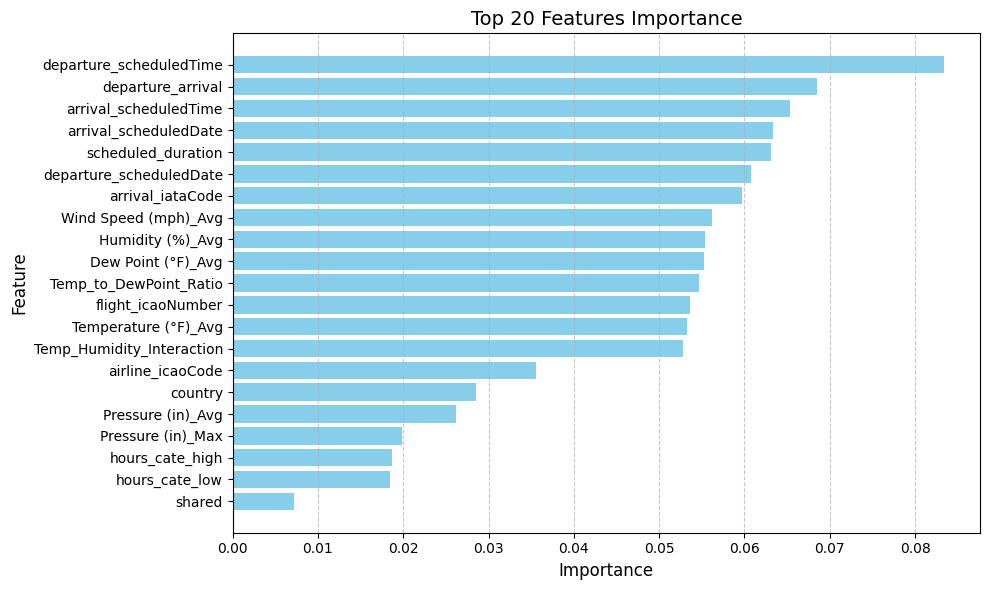

In [1819]:

# X = balanced_data.drop(['is_delay', 'delay_minutes', 'delay_category',], axis=1) 
# y = balanced_data['delay_category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=5, 
    random_state=42,
    class_weight = 'balanced',
    max_features = 'sqrt'
)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)  
print(f"Training Accuracy: {train_accuracy:.2f}")


# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Features Importance', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


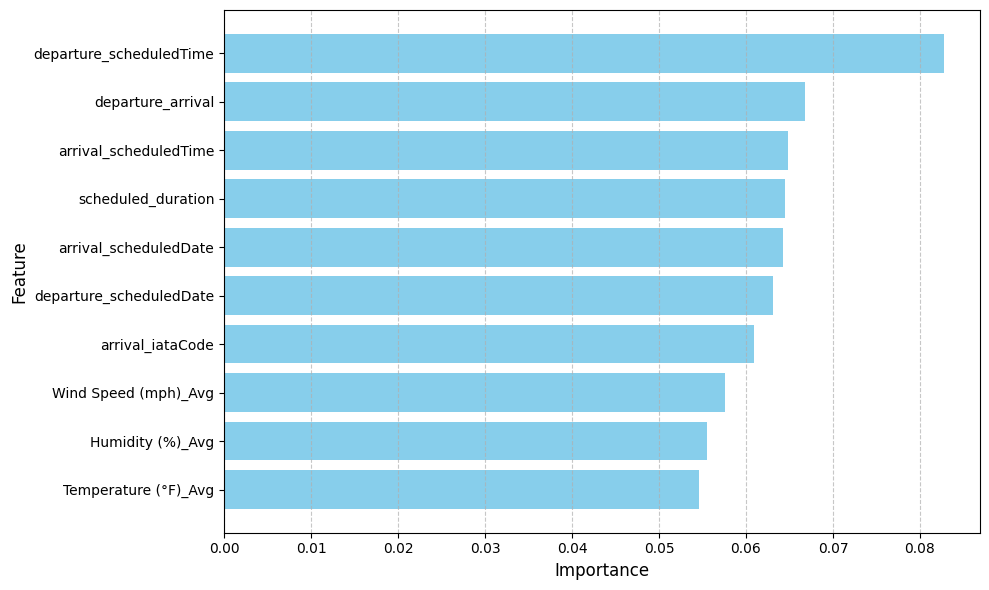

In [1789]:

rf_classifier = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=5, 
    random_state=42, 
    bootstrap=False,
    class_weight = 'balanced'
)

# Fit the model on the training data
rf_classifier.fit(X, y)
    
test_encoded = test_encoded[X.columns]

y_pred = rf_classifier.predict(test_encoded)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_20_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1790]:


unique_values, freq = np.unique(y_pred, return_counts=True)
print(unique_values)
print(freq)


label_mapping = { 0: 'Moderate Delay', 1: 'No Delay', 2: 'Short Delay'}
y_encoded = pd.Series(y_pred).map(label_mapping)

ID = [ i + 1 for i in range( 12914 )]

submission = pd.DataFrame({
    'ID': ID,      
    'Delay': y_encoded[:12914]
})

# Save to CSV
submission.to_csv('multi.csv', index=False)
submission.head()


[0. 1. 2.]
[  90 3823 9003]


,ID,Delay
0,1,Short Delay
1,2,No Delay
2,3,Short Delay
3,4,No Delay
4,5,No Delay


# Regression

C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3708e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Training MSE: 120.58
Training RMSE: 10.98
Training R² Score: 0.07

Testing MSE: 118.08
Testing RMSE: 10.87
Testing R² Score: 0.08

Top Features by Ridge Coefficient:
                    Feature   Coefficient
20   Temp_to_DewPoint_Ratio  1.224635e+01
17          hours_cate_high  1.569274e+00
8        Dew Point (°F)_Avg  3.067438e-01
9          Humidity (%)_Avg  1.712584e-01
1          arrival_iataCode  5.743241e-02
4         flight_icaoNumber  2.487724e-03
2     arrival_scheduledTime  1.136054e-04
6     arrival_scheduledDate  8.914125e-14
5   departure_scheduledDate -8.912199e-14
0   departure_scheduledTime -1.382560e-04


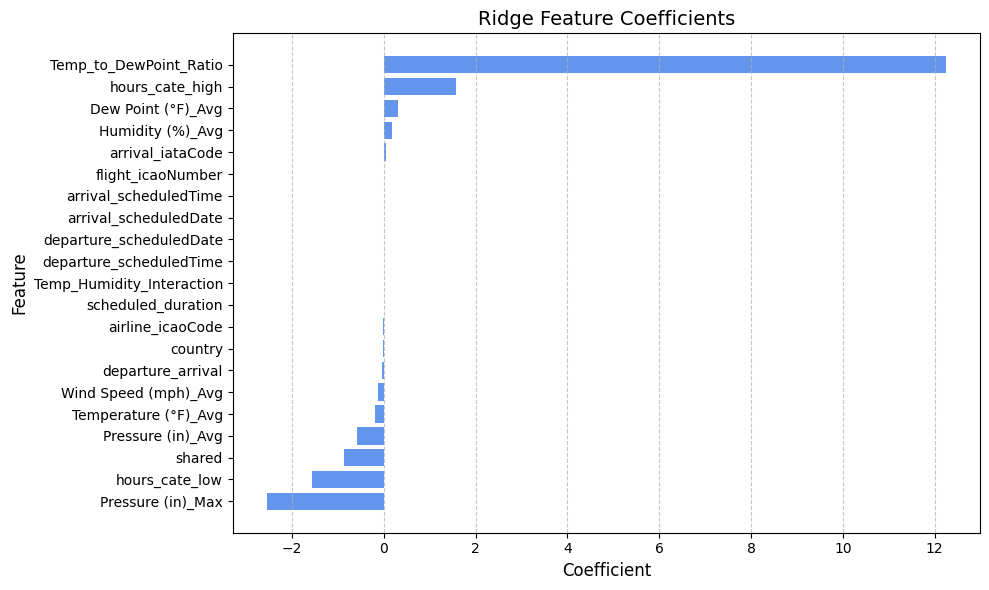

In [1808]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Features and target
X = df_encoded.drop(['is_delay', 'delay_minutes', 'delay_category'], axis=1)
y = df_encoded['delay_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model with best parameters
ridge_regressor = Ridge(alpha=0.1, fit_intercept=True, max_iter=1000, solver='auto', random_state=42)
ridge_regressor.fit(X_train, y_train)


# Make predictions for training and testing sets
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

# Evaluate the model for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R² Score: {train_r2:.2f}\n")

print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")


# Coefficients
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_regressor.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Features by Ridge Coefficient:")
print(ridge_coefficients.head(10))

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'], color='cornflowerblue')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Ridge Feature Coefficients', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Top Features by Coefficient:
                    Feature   Coefficient
20   Temp_to_DewPoint_Ratio  1.359477e+01
17          hours_cate_high  1.583056e+00
8        Dew Point (°F)_Avg  3.799461e-01
9          Humidity (%)_Avg  1.837927e-01
1          arrival_iataCode  5.423295e-02
4         flight_icaoNumber  2.302209e-03
2     arrival_scheduledTime  2.033378e-04
6     arrival_scheduledDate  1.777567e-13
5   departure_scheduledDate -1.777472e-13
0   departure_scheduledTime -2.268815e-04


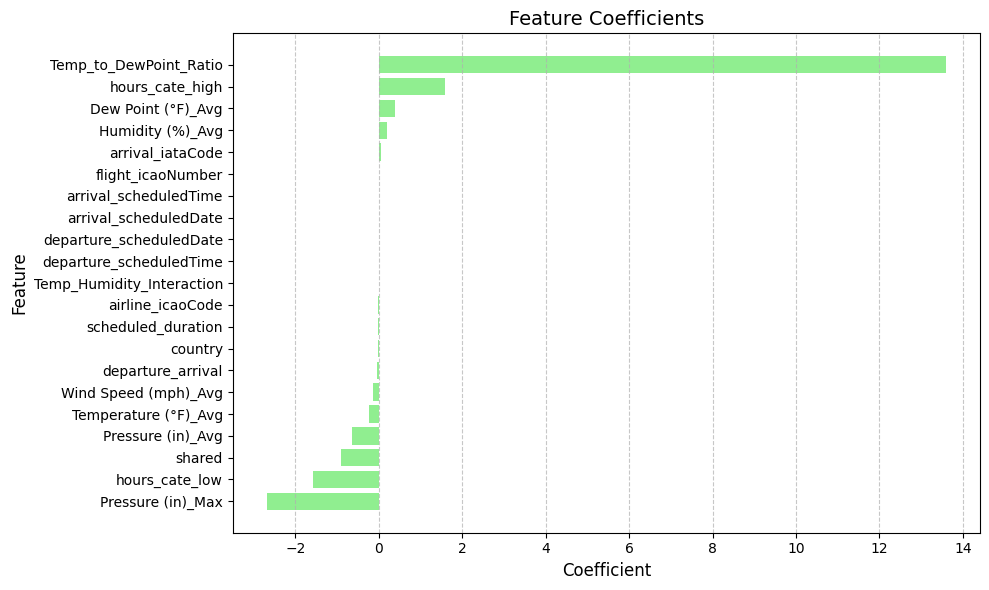

In [1792]:

# Features and target
X = df_encoded.drop(['is_delay', 'delay_minutes', 'delay_category'], axis=1)
y = df_encoded['delay_minutes']

# Initialize and train the Linear Regression model
ridge_regressor = Ridge(alpha=0.1, fit_intercept=True, max_iter=1000, solver='auto', random_state=42)
ridge_regressor.fit(X, y)

# Make predictions
test_encoded = test_encoded[X.columns]
y_pred = ridge_regressor.predict(test_encoded)


# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_regressor.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Features by Coefficient:")
print(coefficients.head(10))

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1793]:

ID = [ i + 1 for i in range( 12914 )]

submission = pd.DataFrame({
    'ID': ID,      
    'Delay': y_pred[:12914]
})

# Save to CSV
submission.to_csv('minutes.csv', index=False)
submission.head()


,ID,Delay
0,1,10.415604
1,2,12.008243
2,3,10.942577
3,4,13.188666
4,5,9.608078


# hyperparameter 

In [1817]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Ridge regression model
ridge_regressor = Ridge(alpha=0.1, fit_intercept=True, max_iter=1000, solver='auto', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    ridge_regressor, 
    X, 
    y, 
    cv=5,  # Number of folds
    scoring='neg_mean_squared_error'  # Use MSE as the scoring metric
)

# Convert negative MSE to positive
cv_mse = -cv_scores
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Results:")
print(f"Mean MSE: {cv_mse.mean():.2f}")
print(f"Mean RMSE: {cv_rmse.mean():.2f}")


Cross-Validation Results:
Mean MSE: 0.22
Mean RMSE: 0.47


C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.23672e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.21712e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.26948e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.24405e-38): result may not be accurate.
  return linalg.solve(A, Xy, assu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the full parameter grid
param_grid = {
    'n_estimators': [300, 500, 700],                # Number of trees
    'max_depth': [None, 20, 30, 40],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 20],               # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples required to be a leaf node
    'bootstrap': [False],                        # Use bootstrap samples
    'class_weight': ['balanced', 'balanced_subsample'],  # Class imbalance handling
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=3,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1            # Use all processors
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)


'Fitting 3 folds for each of 93312 candidates, totalling 279936 fits'

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardize the data
scaler = StandardScaler()

# Ridge Regression Parameter Grid
ridge_param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],  # Optimization solvers
    'ridge__max_iter': [1000, 2000, 5000]  # Maximum iterations for convergence
}

# Lasso Regression Parameter Grid
lasso_param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'lasso__fit_intercept': [True, False],
    'lasso__max_iter': [1000, 2000, 5000],  # Maximum iterations for convergence
    'lasso__selection': ['cyclic', 'random']  # Feature selection strategy
}

# Create Pipelines
ridge_pipeline = Pipeline([
    ('scaler', scaler),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', scaler),
    ('lasso', Lasso())
])

# Grid Search for Ridge
ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Grid Search for Lasso
lasso_grid_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=lasso_param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search for Ridge
ridge_grid_search.fit(X_train, y_train)
print("Best Ridge Parameters:", ridge_grid_search.best_params_)
print("Best Ridge R² Score:", ridge_grid_search.best_score_)

# Fit Grid Search for Lasso
lasso_grid_search.fit(X_train, y_train)
print("Best Lasso Parameters:", lasso_grid_search.best_params_)
print("Best Lasso R² Score:", lasso_grid_search.best_score_)

# Evaluate the best model from Ridge or Lasso on test data
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_

y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_lasso = best_lasso_model.predict(X_test)

print("\nRidge Test Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.2f}")

print("\nLasso Test Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.2f}")


Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Muhammad Umer\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Ridge Parameters: {'ridge__alpha': 0.1, 'ridge__fit_intercept': True, 'ridge__max_iter': 1000, 'ridge__solver': 'auto'}
Best Ridge R² Score: 0.06988882926620463
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Lasso Parameters: {'lasso__alpha': 0.01, 'lasso__fit_intercept': True, 'lasso__max_iter': 1000, 'lasso__selection': 'cyclic'}
Best Lasso R² Score: 0.0698819355523603

Ridge Test Metrics:
Mean Squared Error: 118.17
R² Score: 0.08

Lasso Test Metrics:
Mean Squared Error: 118.21
R² Score: 0.08
